### Imputation through Deep learning models 
using datawig API

In [3]:
import datawig
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
RANDOM_SEED = 42

df = pd.read_csv("iris_data.csv")
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Visualization

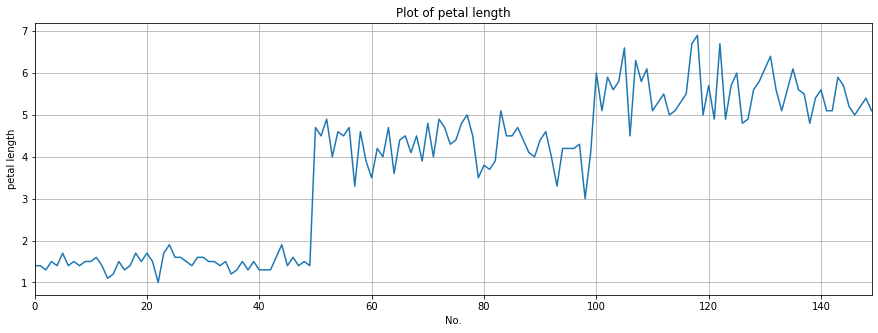

In [4]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.title('Plot of petal length')
plt.ylabel('petal length')
plt.xlabel('No.')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['petal length'])

# fig, axs = plt.subplots(2, 1)
# axs[0].plot(df['petal length'])
# axs[1].plot(test_data['petal length'])
# axs[0].set_title("Petal length", fontsize=20)
# axs[1].set_title("", fontsize=20)
# fig.tight_layout()

### Training Model

Datawig: https://datawig.readthedocs.io/en/latest/source/userguide.html

#### 1. SimpleImputer

SimpleImputer model based on n-grams of concatenated strings of input columns and concatenated numerical features

In [6]:
import datawig
import pandas as pd


df_train, df_test = train_test_split(df, test_size=0.15, random_state=RANDOM_SEED)
#df_train, df_test = datawig.utils.random_split(df)

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['sepal length','sepal width','petal width','class'], # column(s) containing information about the column we want to impute
    output_column='petal length', # the column we'd like to impute values for
    #output_path = 'imputer_model', # stores model data and metrics
    )

#hyperparameter opimization for numerical data
imputer.fit_hpo(
    train_df=df_train,
    num_epochs=50,
    learning_rate_candidates=[1e-3, 1e-4],
    final_fc_hidden_units=[[100]]
)

#Fit an imputer model on the train data
imputer.fit(train_df=df_train)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test)

2021-04-24 07:08:47,396 [INFO]  
========== start: fit model
2021-04-24 07:08:47,397 [WARNING]  Already bound, ignoring bind()
2021-04-24 07:08:47,856 [INFO]  Epoch[0] Batch [0-4]	Speed: 215.29 samples/sec	cross-entropy=16.624695	petal length-accuracy=0.000000
2021-04-24 07:08:48,061 [INFO]  Epoch[0] Train-cross-entropy=16.001578
2021-04-24 07:08:48,062 [INFO]  Epoch[0] Train-petal length-accuracy=0.000000
2021-04-24 07:08:48,063 [INFO]  Epoch[0] Time cost=0.649
2021-04-24 07:08:48,090 [INFO]  Saved checkpoint to "imputer_model0/model-0000.params"
2021-04-24 07:08:48,388 [INFO]  Epoch[0] Validation-cross-entropy=13.361921
2021-04-24 07:08:48,389 [INFO]  Epoch[0] Validation-petal length-accuracy=0.000000
2021-04-24 07:08:48,794 [INFO]  Epoch[1] Batch [0-4]	Speed: 206.25 samples/sec	cross-entropy=16.444665	petal length-accuracy=0.000000
2021-04-24 07:08:49,030 [INFO]  Epoch[1] Train-cross-entropy=15.824350
2021-04-24 07:08:49,032 [INFO]  Epoch[1] Train-petal length-accuracy=0.000000
2021

2021-04-24 07:08:59,014 [INFO]  Epoch[13] Validation-cross-entropy=11.565489
2021-04-24 07:08:59,015 [INFO]  Epoch[13] Validation-petal length-accuracy=0.000000
2021-04-24 07:08:59,478 [INFO]  Epoch[14] Batch [0-4]	Speed: 166.08 samples/sec	cross-entropy=14.260944	petal length-accuracy=0.000000
2021-04-24 07:08:59,681 [INFO]  Epoch[14] Train-cross-entropy=13.662581
2021-04-24 07:08:59,682 [INFO]  Epoch[14] Train-petal length-accuracy=0.000000
2021-04-24 07:08:59,683 [INFO]  Epoch[14] Time cost=0.668
2021-04-24 07:08:59,710 [INFO]  Saved checkpoint to "imputer_model0/model-0014.params"
2021-04-24 07:08:59,883 [INFO]  Epoch[14] Validation-cross-entropy=11.430061
2021-04-24 07:08:59,884 [INFO]  Epoch[14] Validation-petal length-accuracy=0.000000
2021-04-24 07:09:00,462 [INFO]  Epoch[15] Batch [0-4]	Speed: 162.51 samples/sec	cross-entropy=14.097106	petal length-accuracy=0.000000
2021-04-24 07:09:00,607 [INFO]  Epoch[15] Train-cross-entropy=13.500916
2021-04-24 07:09:00,608 [INFO]  Epoch[15

2021-04-24 07:09:09,119 [INFO]  Saved checkpoint to "imputer_model0/model-0027.params"
2021-04-24 07:09:09,277 [INFO]  Epoch[27] Validation-cross-entropy=9.711245
2021-04-24 07:09:09,278 [INFO]  Epoch[27] Validation-petal length-accuracy=0.000000
2021-04-24 07:09:09,729 [INFO]  Epoch[28] Batch [0-4]	Speed: 174.70 samples/sec	cross-entropy=12.025409	petal length-accuracy=0.000000
2021-04-24 07:09:09,879 [INFO]  Epoch[28] Train-cross-entropy=11.462928
2021-04-24 07:09:09,881 [INFO]  Epoch[28] Train-petal length-accuracy=0.000000
2021-04-24 07:09:09,883 [INFO]  Epoch[28] Time cost=0.604
2021-04-24 07:09:09,906 [INFO]  Saved checkpoint to "imputer_model0/model-0028.params"
2021-04-24 07:09:10,041 [INFO]  Epoch[28] Validation-cross-entropy=9.582788
2021-04-24 07:09:10,042 [INFO]  Epoch[28] Validation-petal length-accuracy=0.000000
2021-04-24 07:09:10,437 [INFO]  Epoch[29] Batch [0-4]	Speed: 204.14 samples/sec	cross-entropy=11.871108	petal length-accuracy=0.000000
2021-04-24 07:09:10,582 [IN

2021-04-24 07:09:19,443 [INFO]  Epoch[41] Time cost=0.621
2021-04-24 07:09:19,473 [INFO]  Saved checkpoint to "imputer_model0/model-0041.params"
2021-04-24 07:09:19,610 [INFO]  Epoch[41] Validation-cross-entropy=7.973606
2021-04-24 07:09:19,611 [INFO]  Epoch[41] Validation-petal length-accuracy=0.000000
2021-04-24 07:09:19,983 [INFO]  Epoch[42] Batch [0-4]	Speed: 218.28 samples/sec	cross-entropy=9.943874	petal length-accuracy=0.000000
2021-04-24 07:09:20,138 [INFO]  Epoch[42] Train-cross-entropy=9.426695
2021-04-24 07:09:20,139 [INFO]  Epoch[42] Train-petal length-accuracy=0.000000
2021-04-24 07:09:20,140 [INFO]  Epoch[42] Time cost=0.528
2021-04-24 07:09:20,167 [INFO]  Saved checkpoint to "imputer_model0/model-0042.params"
2021-04-24 07:09:20,300 [INFO]  Epoch[42] Validation-cross-entropy=7.854952
2021-04-24 07:09:20,301 [INFO]  Epoch[42] Validation-petal length-accuracy=0.000000
2021-04-24 07:09:20,663 [INFO]  Epoch[43] Batch [0-4]	Speed: 229.68 samples/sec	cross-entropy=9.802141	pet

In [7]:
imputed.head()

,sepal length,sepal width,petal length,petal width,class,petal length_imputed
73,6.1,2.8,4.7,1.2,Iris-versicolor,4.180664
18,5.7,3.8,1.7,0.3,Iris-setosa,1.692329
118,7.7,2.6,6.9,2.3,Iris-virginica,6.463893
78,6.0,2.9,4.5,1.5,Iris-versicolor,4.448888
76,6.8,2.8,4.8,1.4,Iris-versicolor,4.940437


#### 2. Imputer
LSTM: Imputer model based on deep learning trained with MxNet

This model is more suitable for classficiation tasks or with language data

In [197]:
from datawig import SequentialEncoder, NumericalEncoder
from datawig import LSTMFeaturizer
from datawig import Imputer

#Using LSTMs instead of bag-of-words
data_encoder_cols = [SequentialEncoder('sepal length'), 
                     SequentialEncoder('sepal width'),
                     SequentialEncoder('petal width'),
                     SequentialEncoder('class')]
label_encoder_cols = [NumericalEncoder('petal length')]
#label_encoder_cols = [CategoricalEncoder('finish')]
data_featurizer_cols = [LSTMFeaturizer('sepal length'), 
                        LSTMFeaturizer('sepal width'),
                        LSTMFeaturizer('petal width'),
                        LSTMFeaturizer('class')]

imputer_lstm = Imputer(
    data_featurizers=data_featurizer_cols,
    label_encoders=label_encoder_cols,
    data_encoders=data_encoder_cols,
    #output_path='imputer_model'
)

#Fit an imputer model on the train data
imputer_lstm.fit(train_df=df_train)

#Impute missing values and return original dataframe with predictions
imputed_lstm = imputer_lstm.predict(df_test)
imputed.head()

,sepal length,sepal width,petal length,petal width,class,petal length_imputed
0,5.1,3.5,1.4,0.2,Iris-setosa,1.427402
1,4.9,3.0,1.4,0.2,Iris-setosa,1.469658
2,4.7,3.2,1.3,0.2,Iris-setosa,1.339920
3,4.6,3.1,1.5,0.2,Iris-setosa,1.324171
4,5.0,3.6,1.4,0.2,Iris-setosa,1.367156


#### 3. Bag of Words
Bag-of-Words encoder for text data, using sklearn’s HashingVectorizer

In [ ]:
from datawig import BowEncoder, BowFeaturizer

#Specify encoders and featurizers
data_encoder_cols = [BowEncoder('sepal length'), 
                     BowEncoder('sepal width'),
                     BowEncoder('petal width'),
                     BowEncoder('class')]
label_encoder_cols = [NumericalEncoder('petal length')]
data_featurizer_cols = [BowFeaturizer('sepal length'), 
                        BowFeaturizer('sepal width'),
                        BowFeaturizer('petal width'),
                        BowFeaturizer('class')]

imputer = Imputer(
    data_featurizers=data_featurizer_cols,
    label_encoders=label_encoder_cols,
    data_encoders=data_encoder_cols,
    #output_path='imputer_model'
)

imputer.fit(train_df=df_train)
predictions = imputer.predict(df_test)

### Evaluation

using RMSE

Root Mean Square Error

Predicted (n-gram):  0.2551264313581909
Predicted (LSTM):  0.4727734198130252
Baseline (random imputation) 2.332270856383711


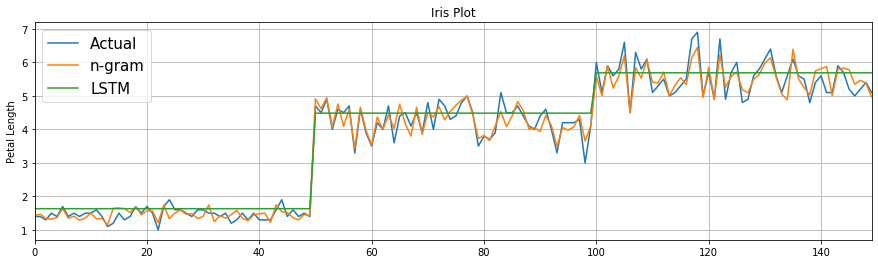

In [213]:
#df[df.index == 1]
#imputed.sort_index()
import math

baseline = np.random.uniform(
    low = min(imputed['petal length']),
    high = max(imputed['petal length']),
    size=len(imputed))

MSE = [np.square(np.subtract(imputed['petal length'],
                             imputed['petal length_imputed'])).mean(), 
       np.square(np.subtract(imputed['petal length'],
                             imputed_lstm['petal length_imputed'])).mean(), 
       np.square(np.subtract(imputed['petal length'],
                             baseline)).mean()]
 
RMSE1 = math.sqrt(MSE[0])
RMSE2 = math.sqrt(MSE[1])
RMSE3 = math.sqrt(MSE[2])
print("Root Mean Square Error\n")
print("Predicted (n-gram): ", RMSE1)
print("Predicted (LSTM): ", RMSE2)
print("Baseline (random imputation)", RMSE3)


fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

plt.title('Iris Plot')
plt.ylabel('Petal Length')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(df.sort_index()['petal length'],label = "Actual")
plt.plot(imputed.sort_index()['petal length_imputed'],label = "n-gram")
plt.plot(imputed_lstm.sort_index()['petal length_imputed'],label = "LSTM")
# show a legend on the plot
plt.legend(fontsize = 15)
plt.show()

### Using Files with Missing Values

In [214]:
df_mv = pd.read_csv('iris_with_MV.csv')

### Types of missing values
* nan

#### potential
* n/a
* na
* NA
* -
* ''

#### different data type
* e.g. expected numbers but has strings

In [215]:
df_mv.isnull().sum()

sepal length     0
sepal width      0
petal length    22
petal width      0
class            0
dtype: int64

In [216]:
#missing_values = ["n/a", "na", "--"]
#df_test = pd.read_csv("iris_with_MV.csv", na_values = missing_values)

df_mv_list = df_mv[df_mv['petal length'].isnull()]
df_mv_list.head()

,sepal length,sepal width,petal length,petal width,class
9,4.9,3.1,NaN,0.1,Iris-setosa
10,5.4,3.7,NaN,0.2,Iris-setosa
17,5.1,3.5,NaN,0.3,Iris-setosa
22,4.6,3.6,NaN,0.2,Iris-setosa
29,4.7,3.2,NaN,0.2,Iris-setosa


In [233]:
#Impute missing values and return original dataframe with predictions
imputed_mv = imputer.predict(df_mv_list)

In [234]:
#bring and map actual values from the original data
imputed_mv['actual'] = imputed_mv.index.map(df.set_index(df.index)['petal length'])
imputed_mv.head()

,sepal length,sepal width,petal length,petal width,class,petal length_imputed,actual
9,4.9,3.1,NaN,0.1,Iris-setosa,1.349307,1.5
10,5.4,3.7,NaN,0.2,Iris-setosa,1.499052,1.5
17,5.1,3.5,NaN,0.3,Iris-setosa,1.517551,1.4
22,4.6,3.6,NaN,0.2,Iris-setosa,1.213442,1.0
29,4.7,3.2,NaN,0.2,Iris-setosa,1.339920,1.6


In [241]:
len(imputed_mv['petal length'])

22

Root Mean Square Error

Predicted (n-gram):  0.19219704266680365
Baseline (random imputation) 2.889291002538939


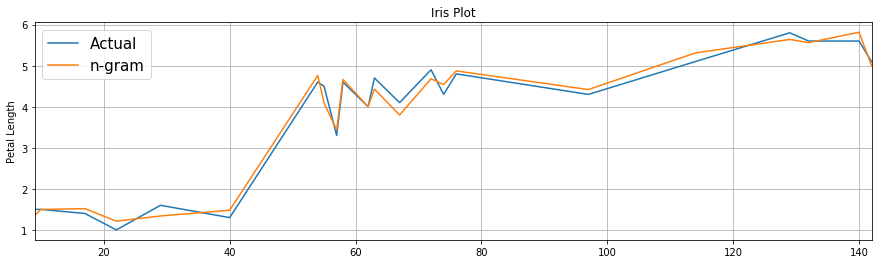

In [248]:
#df[df.index == 1]
#imputed.sort_index()
import math

baseline = np.random.uniform(
    low = min(df['petal length']),
    high = max(df['petal length']),
    size = len(imputed_mv))

MSE = [np.square(np.subtract(imputed_mv['actual'],
                             imputed_mv['petal length_imputed'])).mean(),
       np.square(np.subtract(imputed_mv['actual'],
                             baseline)).mean()]
 
RMSE1 = math.sqrt(MSE[0])
RMSE2 = math.sqrt(MSE[1])
print("Root Mean Square Error\n")
print("Predicted (n-gram): ", RMSE1)
print("Baseline (random imputation)", RMSE2)


fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

plt.title('Iris Plot')
plt.ylabel('Petal Length')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(imputed_mv.sort_index()['actual'],label = "Actual")
plt.plot(imputed_mv.sort_index()['petal length_imputed'],label = "n-gram")
#plt.plot(imputed_mv.sort_index()['petal length_imputed'],label = "LSTM")
# show a legend on the plot
plt.legend(fontsize = 15)
plt.show()

#### Going forward
* larger dataset
* classification tasks
* different missing value types